In [1]:
import sys
sys.path.append('..')

In [2]:
import os
from tqdm import tqdm
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from collections import defaultdict

In [3]:
from sklearn.metrics import mean_squared_error
from scipy import stats

In [4]:
data_path = '/nethome/kgeorge/workspace/DomainPrediction/Data/al_test_experiments/Tdomain'

In [5]:
results_file = os.path.join(data_path, 'results_2_tdomain_zeroshot.csv')
df_zeroshot = pd.read_csv(results_file)

In [6]:
results_file = os.path.join(data_path, 'results_2_tdomain_embed.csv')
df_embed = pd.read_csv(results_file)

In [7]:
results_file = os.path.join(data_path, 'results_2_tdomain_confit.csv')
df_confit = pd.read_csv(results_file)

In [8]:
df_zeroshot.head()

,name,seq,fitness_raw,split_id,n_mut,fitness_log,pred_ESM650M_perplexity,pred_ESM3_perplexity,pred_ESMC300M_perplexity,pred_ESMC600M_perplexity,pred_ESM650M_wt_marginal,pred_ESM650M_masked_marginal,pred_ESM3_wt_marginal,pred_ESM3_masked_marginal,pred_ESMC300_wt_marginal,pred_ESMC300_masked_marginal,pred_ESMC600_wt_marginal,pred_ESMC600_masked_marginal
0,WT,APGEDAFARQAYQAPQGEIEIALATIWRELLNVEQVGRHDSFFALG...,1.000000,2,0,0.000000,5.838970,5.716982,3.957926,3.351393,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,ESM1,APEDSSFPRPPYAAPEGEIEQTLAGIWMELLGVERVGRHDSFFALG...,0.982485,2,44,-0.017670,4.857078,4.464974,4.347416,3.669246,-135.586573,28.091990,-14.661011,31.044922,-44.664551,0.751953,-39.687256,-8.774414
2,ESM2,APSEDAYPRATYEAPEGETEQLLAGIWMDLLQVDRVGRHDSFFELG...,0.958725,0,45,-0.042151,5.156052,4.475316,3.766888,3.482251,-153.070463,13.737211,-22.985719,16.040283,-34.746094,3.162109,-25.489258,-6.632812
3,ESM3,APSEDSYPRPAYVAPEGPTEQLLAGIWQELLNVSKVGRDDSFFDLG...,0.035325,2,46,-3.343159,5.747274,4.807921,4.690301,4.395126,-158.843845,8.434243,-23.986695,14.399170,-58.921509,-14.605225,-37.503906,-27.378235
4,ESM4,APEEASYPREPYVAPQGETEQLLASIWQELLGVERVGAGDNFFELG...,0.457921,2,43,-0.781059,5.075125,4.470202,4.324977,3.690752,-147.443728,16.479620,-22.645508,18.259033,-61.703735,-11.432983,-50.120605,-20.857056


In [9]:
df_embed.head()

,name,seq,fitness_raw,split_id,n_mut,fitness_log,pred_OHE_ridge,pred_OHE_RF,pred_OHE_MLP,pred_ESM650M_feat_mean_ridge,...,pred_ESMC600M_feat_mean_RF,pred_ESMC600M_feat_mean_MLP,pred_ESM650M_concat_ridge,pred_ESM650M_concat_RF,pred_ESM3_concat_ridge,pred_ESM3_concat_RF,pred_ESMC300M_concat_ridge,pred_ESMC300M_concat_RF,pred_ESMC600M_concat_ridge,pred_ESMC600M_concat_RF
0,WT,APGEDAFARQAYQAPQGEIEIALATIWRELLNVEQVGRHDSFFALG...,1.000000,2,0,0.000000,-0.436382,-0.203425,-0.525023,-1.685158,...,-0.186514,-2.256885,-0.089193,-0.169526,-0.000059,-0.218837,-0.023438,-0.136926,-0.240402,-0.192937
1,ESM1,APEDSSFPRPPYAAPEGEIEQTLAGIWMELLGVERVGRHDSFFALG...,0.982485,2,44,-0.017670,-0.060490,-0.909786,0.088553,-1.504204,...,-1.378162,-3.575474,-0.024525,-0.921890,-0.017682,-0.790667,-0.120979,-1.445829,-0.097765,-0.849015
2,ESM2,APSEDAYPRATYEAPEGETEQLLAGIWMDLLQVDRVGRHDSFFELG...,0.958725,0,45,-0.042151,-0.201984,-1.544877,-0.125632,-1.784403,...,-2.214575,-3.199795,0.729046,-2.754943,-2.170417,-2.145712,0.898127,-2.905914,0.681065,-2.597517
3,ESM3,APSEDSYPRPAYVAPEGPTEQLLAGIWQELLNVSKVGRDDSFFDLG...,0.035325,2,46,-3.343159,-3.311647,-3.010355,-3.247069,-4.037582,...,-3.596444,-4.096789,-3.340492,-3.072531,-3.343050,-3.063369,-3.192398,-3.788400,-3.255329,-3.222380
4,ESM4,APEEASYPREPYVAPQGETEQLLASIWQELLGVERVGAGDNFFELG...,0.457921,2,43,-0.781059,-0.778362,-0.998879,-0.588572,-2.700714,...,-2.666684,-3.962456,-0.777168,-1.794385,-0.780770,-1.264113,-0.818241,-1.880625,-0.808338,-1.931551


In [10]:
df_confit.head()

,name,seq,fitness_raw,split_id,n_mut,fitness_log,pred_ESM650M_confit,pred_ESMC300M_confit,pred_ESMC600M_confit
0,WT,APGEDAFARQAYQAPQGEIEIALATIWRELLNVEQVGRHDSFFALG...,1.000000,2,0,0.000000,0.000000,0.000000,0.000000
1,ESM1,APEDSSFPRPPYAAPEGEIEQTLAGIWMELLGVERVGRHDSFFALG...,0.982485,2,44,-0.017670,3.345487,1.748047,-1.813965
2,ESM2,APSEDAYPRATYEAPEGETEQLLAGIWMDLLQVDRVGRHDSFFELG...,0.958725,0,45,-0.042151,-3.205000,2.612305,5.303711
3,ESM3,APSEDSYPRPAYVAPEGPTEQLLAGIWQELLNVSKVGRDDSFFDLG...,0.035325,2,46,-3.343159,-8.855375,-14.083740,-19.246704
4,ESM4,APEEASYPREPYVAPQGETEQLLASIWQELLGVERVGAGDNFFELG...,0.457921,2,43,-0.781059,-0.798962,-2.969727,-12.833252


In [11]:
def get_spearmanr_bootstrap(a, b, n=1000):
    assert len(a) == len(b)
    corr = []
    p_value = []
    np.random.seed(0)
    for _ in range(n):
        indices = np.random.choice(len(a), size=len(a), replace=True)
        res = stats.spearmanr(a.iloc[indices], b.iloc[indices])
        
        if not np.isnan(res.statistic):
            corr.append(res.statistic)
            p_value.append(res.pvalue)

    ci_lower, ci_upper = np.percentile(corr, [5, 95]) 
    # stats.t.interval(confidence=0.95, df=len(corr)-1, loc=np.mean(corr), scale=np.std(corr))
    mean_corr = np.mean(corr)

    return round(mean_corr, 2), round(ci_lower, 2), round(ci_upper, 2), corr, p_value

#### Tables

In [12]:
def get_split_mask(df):

    train_mask = (df['split_id'] == 2)

    val_mask = df['split_id'] == 1
    # test_mask = df['split_id'] == 0
    test_mask = df['split_id'].isin([0, 1])

    return train_mask, val_mask, test_mask

In [13]:
def get_table(df, omit=True, fit_label='fitness_log', omit_label=None):
    table = {}
    for label in df.columns[df.columns.str.contains('pred')]:
        train_mask, _, test_mask = get_split_mask(df)
        assert fit_label in df.columns
        
        if omit:
            assert omit_label is not None and omit_label in df.columns
            omit_mask = df[omit_label] != 0
            train_corr, train_ci_lower, train_ci_upper, *_  = get_spearmanr_bootstrap(df.loc[train_mask & omit_mask, fit_label], df.loc[train_mask & omit_mask, label])
            test_corr, test_ci_lower, test_ci_upper, *_ = get_spearmanr_bootstrap(df.loc[test_mask & omit_mask, fit_label], df.loc[test_mask & omit_mask, label])
        else:
            train_corr, train_ci_lower, train_ci_upper, *_ = round(stats.spearmanr(df.loc[train_mask, fit_label], df.loc[train_mask, label]).statistic, 2)
            test_corr, test_ci_lower, test_ci_upper, *_ = round(stats.spearmanr(df.loc[test_mask, fit_label], df.loc[test_mask, label]).statistic, 2)
        
        table[label] = [train_corr, (train_ci_lower, train_ci_upper), test_corr, (test_ci_lower, test_ci_upper)]

    df_table = pd.DataFrame(table).T
    df_table.columns = ['train', 'train CI', 'test', 'test CI']

    return df_table

In [14]:
res_table_embed = get_table(df_embed, omit=True, fit_label='fitness_log', omit_label='fitness_raw')

In [15]:
res_table_embed.head()

,train,train CI,test,test CI
pred_OHE_ridge,0.94,"(0.87, 0.99)",0.15,"(-0.24, 0.52)"
pred_OHE_RF,0.88,"(0.78, 0.96)",0.49,"(0.22, 0.74)"
pred_OHE_MLP,0.96,"(0.91, 1.0)",0.1,"(-0.26, 0.48)"
pred_ESM650M_feat_mean_ridge,0.7,"(0.51, 0.84)",-0.3,"(-0.57, 0.0)"
pred_ESM650M_feat_mean_RF,0.9,"(0.81, 0.96)",0.08,"(-0.28, 0.4)"


In [16]:
res_table_embed.loc[res_table_embed.index.str.contains('ESM650M')]

,train,train CI,test,test CI
pred_ESM650M_feat_mean_ridge,0.7,"(0.51, 0.84)",-0.3,"(-0.57, 0.0)"
pred_ESM650M_feat_mean_RF,0.9,"(0.81, 0.96)",0.08,"(-0.28, 0.4)"
pred_ESM650M_feat_mean_MLP,0.54,"(0.3, 0.72)",-0.61,"(-0.8, -0.37)"
pred_ESM650M_concat_ridge,1.0,"(0.99, 1.0)",0.23,"(-0.11, 0.59)"
pred_ESM650M_concat_RF,0.88,"(0.79, 0.95)",0.16,"(-0.2, 0.51)"


In [17]:
res_table_zeroshot = get_table(df_zeroshot, omit=True, fit_label='fitness_log', omit_label='fitness_raw')

In [18]:
res_table_zeroshot.head()

,train,train CI,test,test CI
pred_ESM650M_perplexity,-0.54,"(-0.73, -0.32)",0.43,"(0.15, 0.69)"
pred_ESM3_perplexity,-0.56,"(-0.75, -0.35)",0.45,"(0.15, 0.71)"
pred_ESMC300M_perplexity,-0.68,"(-0.83, -0.5)",0.25,"(0.03, 0.46)"
pred_ESMC600M_perplexity,-0.69,"(-0.84, -0.51)",0.1,"(-0.21, 0.37)"
pred_ESM650M_wt_marginal,0.57,"(0.37, 0.75)",0.48,"(0.21, 0.73)"


In [19]:
res_table_zeroshot.loc[res_table_zeroshot.index.str.contains('masked')]

,train,train CI,test,test CI
pred_ESM650M_masked_marginal,0.57,"(0.36, 0.75)",-0.06,"(-0.43, 0.29)"
pred_ESM3_masked_marginal,0.61,"(0.41, 0.78)",-0.49,"(-0.74, -0.2)"
pred_ESMC300_masked_marginal,0.73,"(0.56, 0.87)",-0.66,"(-0.81, -0.46)"
pred_ESMC600_masked_marginal,0.71,"(0.55, 0.84)",-0.32,"(-0.58, -0.02)"


In [20]:
res_table_confit = get_table(df_confit, omit=True, fit_label='fitness_log', omit_label='fitness_raw')

In [21]:
res_table_confit

,train,train CI,test,test CI
pred_ESM650M_confit,0.93,"(0.88, 0.97)",-0.31,"(-0.58, 0.02)"
pred_ESMC300M_confit,0.91,"(0.82, 0.96)",-0.54,"(-0.73, -0.3)"
pred_ESMC600M_confit,0.88,"(0.79, 0.94)",-0.03,"(-0.36, 0.32)"


In [22]:
# Train samples : 53
# Val samples   :  
# Test samples  : 32

In [23]:
def get_panel(df, label, omit=True, fit_label='fitness_log', omit_label=None, subplots=True, remove_low_points=False):
    train_mask, _, test_mask = get_split_mask(df)
    assert fit_label in df.columns
    
    fig, ax = plt.subplots(1,2, figsize=(7,3), layout='constrained')


    if omit:
        assert omit_label is not None and omit_label in df.columns
        if remove_low_points:
            omit_mask = df[omit_label] > 0.01
        else:
            omit_mask = df[omit_label] != 0

        ax[0].plot(df.loc[train_mask & omit_mask, fit_label], df.loc[train_mask & omit_mask, label], '.', alpha=0.9)
        ax[1].plot(df.loc[test_mask & omit_mask,fit_label], df.loc[test_mask & omit_mask, label], '.', alpha=0.9)

        train_corr, train_ci_lower, train_ci_upper, train_corr_list, train_pvalue_list = get_spearmanr_bootstrap(df.loc[train_mask & omit_mask, fit_label], df.loc[train_mask & omit_mask, label]) 
        test_corr, test_ci_lower, test_ci_upper, test_corr_list, test_pvalue_list = get_spearmanr_bootstrap(df.loc[test_mask & omit_mask, fit_label], df.loc[test_mask & omit_mask, label])

        ax[0].set_title(f'Train\nspearman corr {train_corr} CI ({train_ci_lower}, {train_ci_upper})')
        ax[1].set_title(f'Test\nspearman corr {test_corr} CI ({test_ci_lower}, {test_ci_upper})')
    else:
        ax[0].plot(df.loc[train_mask, fit_label], df.loc[train_mask, label], '.', alpha=0.9)
        ax[1].plot(df.loc[test_mask, fit_label], df.loc[test_mask, label], '.', alpha=0.9)

        train_corr = round(stats.spearmanr(df.loc[train_mask, fit_label], df.loc[train_mask, label]).statistic, 2)
        test_corr = round(stats.spearmanr(df.loc[test_mask, fit_label], df.loc[test_mask, label]).statistic, 2)

        train_corr, train_ci_lower, train_ci_upper, train_corr_list, train_pvalue_list = get_spearmanr_bootstrap(df.loc[train_mask, fit_label], df.loc[train_mask, label]) 
        test_corr, test_ci_lower, test_ci_upper, test_corr_list, test_pvalue_list = get_spearmanr_bootstrap(df.loc[test_mask, fit_label], df.loc[test_mask, label])

        ax[0].set_title(f'Train\nspearman corr {train_corr} CI ({train_ci_lower}, {train_ci_upper})')
        ax[1].set_title(f'Test\nspearman corr {test_corr} CI ({test_ci_lower}, {test_ci_upper})')

    for i in range(2):
        ax[i].set_xlabel('True')
        ax[i].set_ylabel('Pred')

    plt.show()

    if subplots:
        fig, ax = plt.subplots(1,2, figsize=(5,2), layout='constrained')
        ax[0].hist(train_corr_list)
        ax[1].hist(test_corr_list)
        plt.show()
        fig, ax = plt.subplots(1,2, figsize=(5,2), layout='constrained')
        ax[0].hist(train_pvalue_list)
        ax[1].hist(test_pvalue_list)
        plt.show()
        

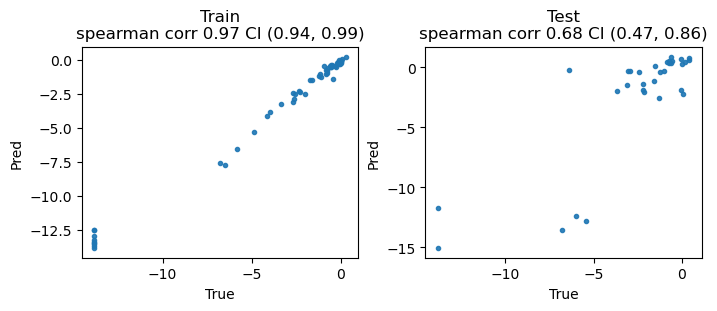

In [24]:
get_panel(df_embed, label='pred_ESMC600M_concat_ridge', omit=False, fit_label='fitness_log', omit_label='fitness_raw', subplots=False, remove_low_points=True)

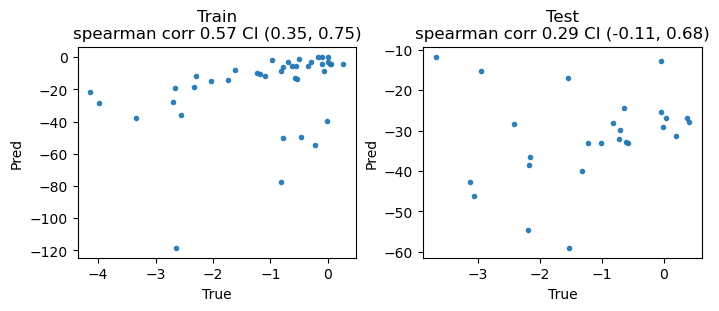

In [25]:
get_panel(df_zeroshot, label='pred_ESMC600_wt_marginal', omit=True, fit_label='fitness_log', omit_label='fitness_raw', subplots=False, remove_low_points=True)

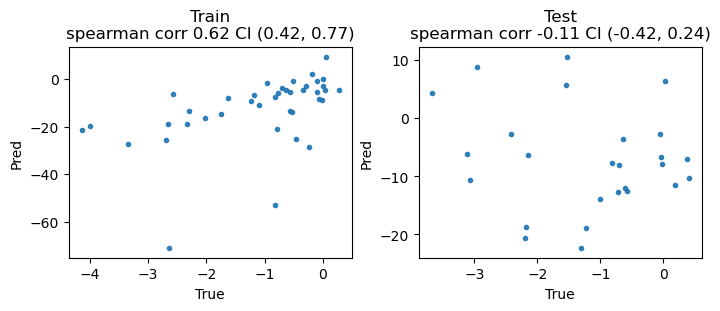

In [26]:
get_panel(df_zeroshot, label='pred_ESMC600_masked_marginal', omit=True, fit_label='fitness_log', omit_label='fitness_raw', subplots=False, remove_low_points=True)

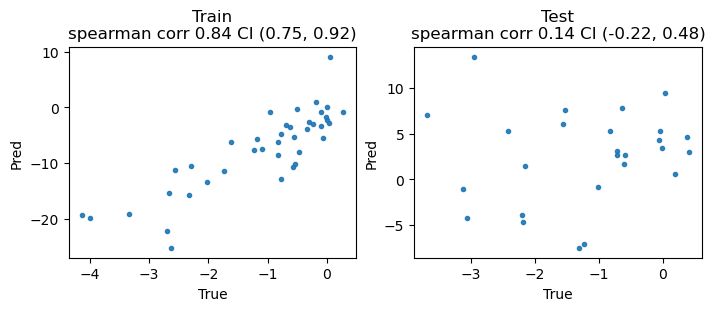

In [28]:
get_panel(df_confit, label='pred_ESMC600M_confit', omit=True, fit_label='fitness_log', omit_label='fitness_raw', subplots=False, remove_low_points=True)

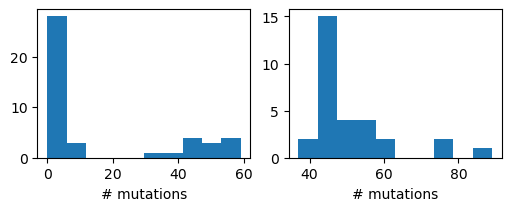

In [27]:
train_mask, _, test_mask = get_split_mask(df_zeroshot)
fig, ax = plt.subplots(1,2, figsize=(5,2), layout='constrained')
_omit_mask = df_zeroshot['fitness_raw'] != 0
ax[0].hist(df_zeroshot.loc[train_mask & _omit_mask, 'n_mut'])
ax[1].hist(df_zeroshot.loc[test_mask & _omit_mask,'n_mut'])
for i in range(2):
    ax[i].set_xlabel('# mutations')

plt.show()

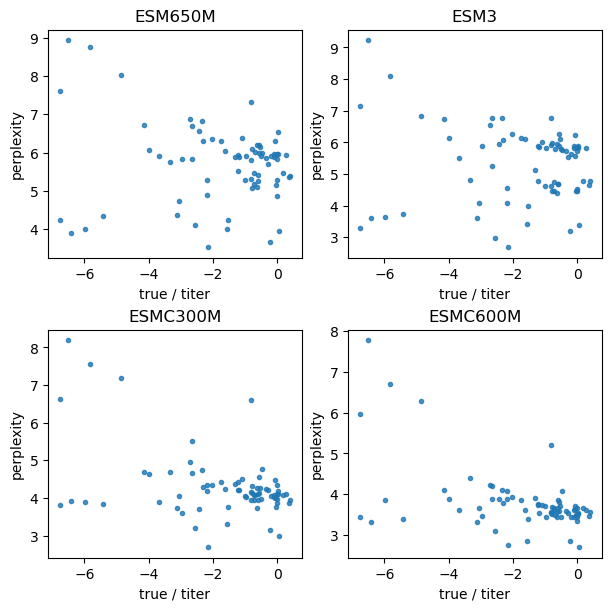

In [28]:
omit = True
fig, ax = plt.subplots(2, 2, figsize=(6,6), layout='constrained')
predictor = 'fitness_raw'
predictor = 'fitness_log'

if omit:
    _omit_mask = df_zeroshot['fitness_raw'] != 0
    for _label, _ax in zip(df_zeroshot.columns[df_zeroshot.columns.str.contains('perplexity')], ax.flatten()):
        _ax.plot(df_zeroshot.loc[_omit_mask, predictor], df_zeroshot.loc[_omit_mask, _label], '.', alpha=0.8)
        _ax.set_xlabel('true / titer')
        _ax.set_ylabel('perplexity')
        _ax.set_title(_label.replace('pred_', '').replace('_perplexity', ''))
else:
    for _label, _ax in zip(df_zeroshot.columns[df_zeroshot.columns.str.contains('perplexity')], ax.flatten()):
        _ax.plot(df_zeroshot[predictor], df_zeroshot[_label], '.', alpha=0.8)
        _ax.set_xlabel('true / titer')
        _ax.set_ylabel('perplexity')
        _ax.set_title(_label.replace('pred_', '').replace('_perplexity', ''))

In [29]:
def get_table_all(df, omit=True, fit_label='fitness_log', omit_label='fitness_raw'):
    table = {}
    for label in df.columns[df.columns.str.contains('pred')]:
        assert fit_label in df.columns
        
        if omit:
            assert omit_label is not None and omit_label in df.columns
            omit_mask = df[omit_label] != 0
            corr, ci_lower, ci_upper, *_ = get_spearmanr_bootstrap(df.loc[omit_mask, fit_label], df.loc[omit_mask, label]) 
        else:
            corr, ci_lower, ci_upper, *_ = get_spearmanr_bootstrap(df.loc[fit_label], df.loc[label])
        
        table[label] = [corr, (ci_lower, ci_upper)]

    df_table = pd.DataFrame(table).T
    df_table.columns = ['corr', '90% CI']

    return df_table

In [30]:
res_zeroshot_all = get_table_all(df_zeroshot, omit=True, fit_label='fitness_log', omit_label='fitness_raw')

In [32]:
res_zeroshot_all.loc[res_zeroshot_all.index.str.contains('masked|wt')]

,corr,90% CI
pred_ESM650M_wt_marginal,0.48,"(0.32, 0.63)"
pred_ESM650M_masked_marginal,0.22,"(0.01, 0.43)"
pred_ESM3_wt_marginal,0.49,"(0.31, 0.65)"
pred_ESM3_masked_marginal,0.09,"(-0.13, 0.33)"
pred_ESMC300_wt_marginal,0.48,"(0.31, 0.63)"
pred_ESMC300_masked_marginal,0.12,"(-0.12, 0.35)"
pred_ESMC600_wt_marginal,0.54,"(0.38, 0.68)"
pred_ESMC600_masked_marginal,0.29,"(0.07, 0.49)"


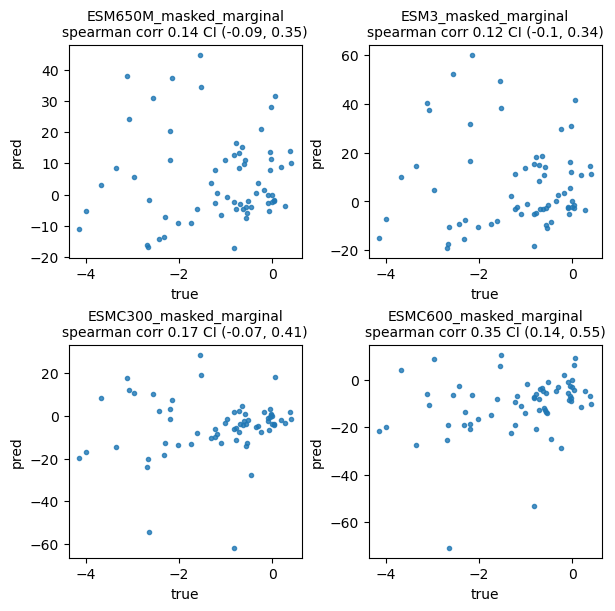

In [33]:
omit = True
remove_low_points = True
predictor = 'masked_marginal'
# predictor = 'wt_marginal'
fig, ax = plt.subplots(2, 2, figsize=(6,6), layout='constrained')

if omit:
    if remove_low_points:
        _omit_mask = df_zeroshot['fitness_raw'] > 0.01
    else:
        _omit_mask = df_zeroshot['fitness_raw'] != 0
        
    for _label, _ax in zip(df_zeroshot.columns[df_zeroshot.columns.str.contains(predictor)], ax.flatten()):
        _ax.plot(df_zeroshot.loc[_omit_mask, 'fitness_log'], df_zeroshot.loc[_omit_mask, _label], '.', alpha=0.8)
        corr, ci_lower, ci_upper, *_ = get_spearmanr_bootstrap(df_zeroshot.loc[_omit_mask, 'fitness_log'], df_zeroshot.loc[_omit_mask, _label])
        _ax.set_xlabel('true')
        _ax.set_ylabel('pred')
        _ax.set_title(f"{_label.replace('pred_', '')}\nspearman corr {corr} CI ({ci_lower}, {ci_upper})", size=10)
else:
    for _label, _ax in zip(df_zeroshot.columns[df_zeroshot.columns.str.contains(predictor)], ax.flatten()):
        _ax.plot(df_zeroshot['fitness_log'], df_zeroshot[_label], '.', alpha=0.8)
        corr, ci_lower, ci_upper, *_ = get_spearmanr_bootstrap(df_zeroshot['fitness_log'], df_zeroshot[_label])
        _ax.set_xlabel('true')
        _ax.set_ylabel('perplexity')
        _ax.set_title(f"{_label.replace('pred_', '')}\nspearman corr {corr} CI ({ci_lower}, {ci_upper})", size=10)

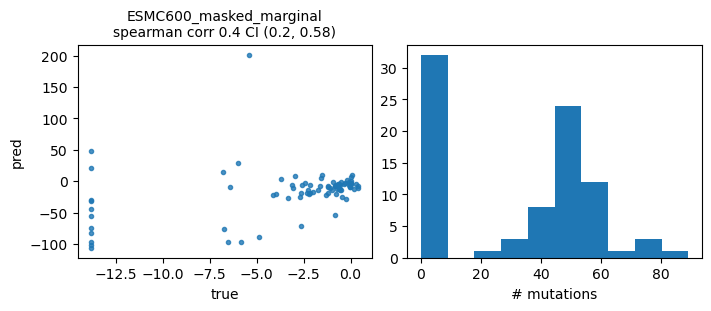

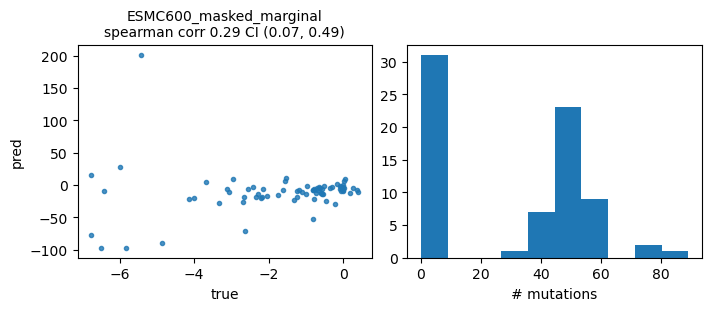

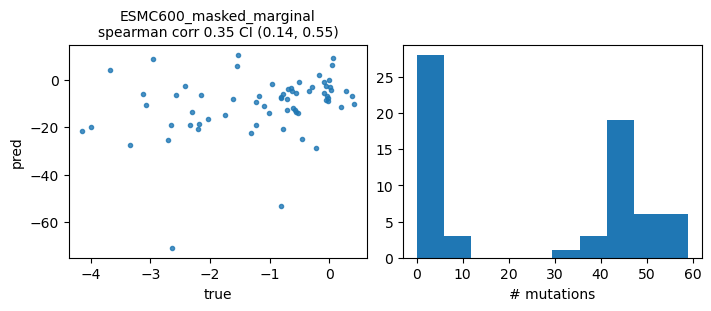

['WT' 'GxpS_DESIGN-1' 'GxpS_DESIGN-3' 'GxpS_DESIGN-4' 'GxpS_DESIGN-5'
 'GxpS_DESIGN-6' 'GxpS_DESIGN-7' 'GxpS_DESIGN-8' 'GxpS_DESIGN-9'
 'GxpS_DESIGN-14' 'GxpS_DESIGN-16' 'GxpS_DESIGN-17' 'GxpS_DESIGN-18'
 'GxpS_DESIGN-19' 'GxpS_DESIGN-20' 'GxpS_DESIGN-21' 'GxpS_DESIGN-24'
 'GxpS_DESIGN-26' 'GxpS_DESIGN-27' 'WT_EP_10_1_34' 'WT_EP_10_1_35'
 'WT_EP_10_1_36' 'WT_EP_10_1_37' 'WT_EP_10_1_38' 'WT_EP_10_1_40'
 'WT_EP_10_1_41' 'WT_EP_10_1_45' 'WT_EP_10_1_47' 'WT_EP_10_1_49'
 'WT_EP_10_1_52' 'WT_EP_10_1_56']


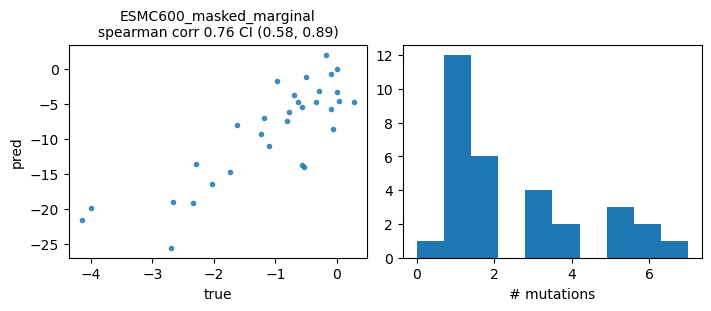

['ESM1' 'ESM2' 'ESM3' 'ESM4' 'IN3' 'IN6' 'esm3_str_gen_53'
 'esm3_str_gen_365' 'evodiff_gen_77' 'II_guidance-ESM3'
 'Test-IN1-improved' 'evodiff_gen_21' 'evodiff_gen_88' 'evodiff_gen_155'
 'evodiff_gen_357' 'esm3_str_gen_314' 'esm3_str_gen_323' 'II guidance-WT'
 'II guidance-ESM2' 'II guidance-IN2' 'prob_guidancd-ESM2'
 'ESM2_EP_10_1_1' 'ESM2_EP_10_1_4' 'ESM2_EP_10_1_5' 'ESM2_EP_10_1_9'
 'ESM2_EP_10_1_10' 'ESM2_EP_10_1_12' 'ESM2_EP_10_1_13' 'ESM2_EP_10_1_14'
 'ESM2_EP_10_1_15' 'ESM2_EP_10_1_16' 'ESM2_EP_10_1_18' 'ESM2_EP_10_1_22'
 'ESM2_EP_10_1_27' 'ESM2_EP_10_1_28']


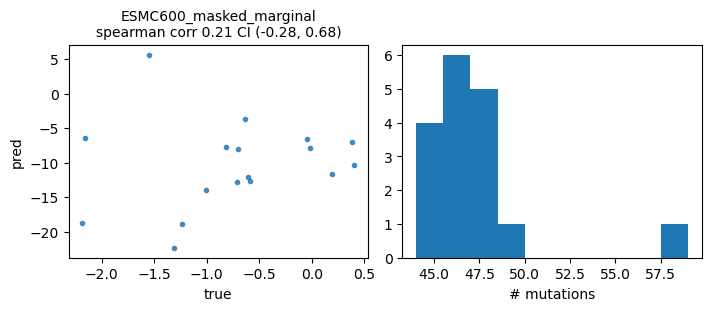

In [42]:
def _plot(df, mask, label):
    fig, ax = plt.subplots(1, 2, figsize=(7,3), layout='constrained')

    ax[0].plot(df.loc[mask, 'fitness_log'], df.loc[mask, label], '.', alpha=0.8)
    corr, ci_lower, ci_upper, *_ = get_spearmanr_bootstrap(df.loc[mask, 'fitness_log'], df.loc[mask, label])
    ax[0].set_xlabel('true')
    ax[0].set_ylabel('pred')
    ax[0].set_title(f"{_label.replace('pred_', '')}\nspearman corr {corr} CI ({ci_lower}, {ci_upper})", size=10)

    ax[1].hist(df_zeroshot.loc[mask, 'n_mut'])
    ax[1].set_xlabel('# mutations')
    plt.show()

_label = 'pred_ESMC600_masked_marginal'
# _label = 'pred_ESMC600_wt_marginal'

_omit_mask = df_zeroshot['fitness_raw'] > -1000
_plot(df_zeroshot, _omit_mask, _label)

_omit_mask = df_zeroshot['fitness_raw'] != 0
_plot(df_zeroshot, _omit_mask, _label)

_omit_mask = df_zeroshot['fitness_raw'] > 0.01
_plot(df_zeroshot, _omit_mask, _label)

mut_mask_20 = df_zeroshot['n_mut'] < 15
_mask = _omit_mask & mut_mask_20
print(df_zeroshot.loc[_mask, 'name'].to_numpy())
_plot(df_zeroshot, _mask, _label)
_mask = _omit_mask & ~mut_mask_20
print(df_zeroshot.loc[_mask, 'name'].to_numpy())
_plot(df_zeroshot, _mask & df_zeroshot['name'].str.contains('ESM2'), _label)
